In [1]:
# import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# load data
data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [3]:
# define X and y 
X = data.drop(['y'], axis = 1)
y = data.loc[:, 'y']

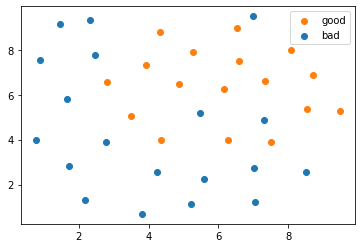

In [4]:
# visualize the data 
fig1 = plt.figure()

bad = plt.scatter(X.loc[:, 'x1'][y == 0], X.loc[:, 'x2'][y == 0])
good = plt.scatter(X.loc[:, 'x1'][y == 1], X.loc[:, 'x2'][y == 1])

plt.legend((good, bad), ('good', 'bad'))

plt.show()

In [5]:
# anomaly data detection
ad_model = EllipticEnvelope(contamination = 0.02)
ad_model.fit(X[y == 0])
y_predict_bad = ad_model.predict(X[y==0])

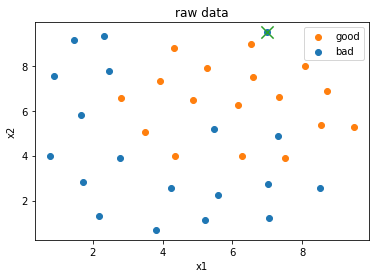

In [6]:
# visualize anomaly data 
fig2 = plt.figure()

bad = plt.scatter(X.loc[:, 'x1'][y == 0], X.loc[:, 'x2'][y == 0])
good = plt.scatter(X.loc[:, 'x1'][y == 1], X.loc[:, 'x2'][y == 1])

plt.scatter(X.loc[:,'x1'][y == 0][y_predict_bad == -1], X.loc[:, 'x2'][y == 0][y_predict_bad == -1], marker='x', s=150)

plt.legend((good, bad), ('good', 'bad'))

plt.title('raw data')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

In [7]:
# split training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.4)

In [8]:
# make prediction with KNN model 
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train, y_train)
y_predict_train = knn_model.predict(X_train)
y_predict_test = knn_model.predict(X_test)

In [9]:
# evaluate the performance 
accuracy_train = accuracy_score(y_train, y_predict_train)
accuracy_test = accuracy_score(y_test, y_predict_test)
print('training data accuracy: ', accuracy_train, '\ntesting data accuracy: ', accuracy_test)

training data accuracy:  0.9047619047619048 
testing data accuracy:  0.5333333333333333


In [10]:
# further analysis the performance of the model with confusion matrix 
cm = confusion_matrix(y_test, y_predict_test)
print(cm)

[[4 3]
 [4 4]]


In [11]:
# extracting values form the matrix 
TP = cm[1, 1] # true_positive
TN = cm[0, 0] # true_negative
FP = cm[0, 1] # false_positive
FN = cm[1, 0] # false_negative

In [12]:
# calculating more metricses: Accuracy, Missclassification rate, Recall, Specificity, Precision, F1 score
accuracy = (TP + TN)/(TP + TN + FP + FN)
recall = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
f1 = 2*precision*recall/(precision+recall)

print('Accuracy: ', accuracy, '\nRecall: ', recall, '\nSpecificity: ', specificity, '\nPrecision: ', precision, '\nF1 score: ', f1)

Accuracy:  0.5333333333333333 
Recall:  0.5 
Specificity:  0.5714285714285714 
Precision:  0.5714285714285714 
F1 score:  0.5333333333333333


In [16]:
# try different k numbers and evaluate the performance
n = [i for i in range(1, 21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn_model2 = KNeighborsClassifier(n_neighbors = i)
    knn_model2.fit(X_train, y_train)
    
    y_predict_train = knn_model2.predict(X_train)
    y_predict_test = knn_model2.predict(X_test)
    
    accuracy_train_i = accuracy_score(y_train, y_predict_train)
    accuracy_test_i = accuracy_score(y_test, y_predict_test)
    
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)

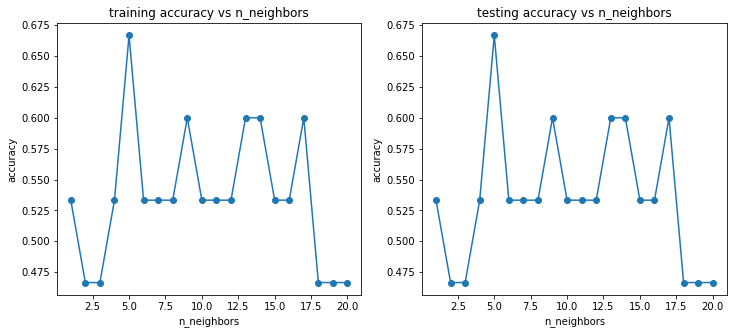

In [18]:
# visualize the result
fig3 = plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(n, accuracy_test, marker = 'o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(n, accuracy_test, marker = 'o')
plt.title('testing accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.show()